In [20]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle("/home/pafakanov/data/hep_data/particles.pkl")

# Detectors

In [3]:
colors = ['black', 'dimgray', 'lightcoral', 'maroon',
          'orangered', 'chocolate', 'tan', 'orange',
          'olive', 'yellow', 'chartreuse', 'forestgreen',
          'turquoise', 'deepskyblue', 'navy', 'mediumpurple',
          'fuchsia', 'pink']

9it [00:09,  1.08s/it]


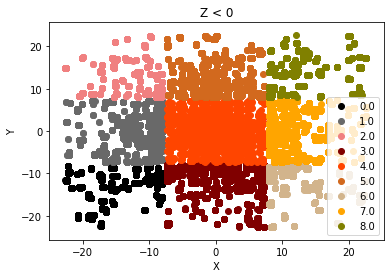

In [4]:
SAMPLES_PER_DETECTOR = 10000
negative_df = df[df['z'] < 0]

detectors = set(sorted(negative_df['detector'].unique()))


plt.title("Z < 0")
for i, detector_num in tqdm.tqdm(enumerate(detectors)):
    detector_df = negative_df[negative_df['detector'] == detector_num].sample(SAMPLES_PER_DETECTOR)
    x_values = detector_df['x']
    y_values = detector_df['y']

    plt.scatter(x_values, y_values, c=colors[i])
    plt.xlabel("X")
    plt.ylabel("Y")
plt.legend(detectors)
plt.show()

9it [00:02,  4.32it/s]


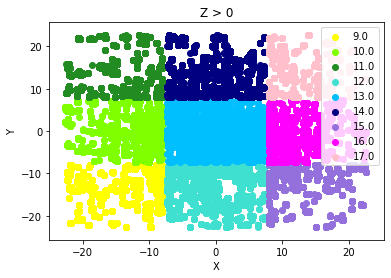

In [5]:
SAMPLES_PER_DETECTOR = 10000
positive_df = df[df['z'] > 0]

detectors = set(sorted(positive_df['detector'].unique()))

plt.title("Z > 0")
for i, detector_num in tqdm.tqdm(enumerate(detectors)):
    detector_df = positive_df[positive_df['detector'] == detector_num].sample(SAMPLES_PER_DETECTOR)
    x_values = detector_df['x']
    y_values = detector_df['y']

    plt.scatter(x_values, y_values, c=colors[i + len(detectors)])
    plt.xlabel("X")
    plt.ylabel("Y")
plt.legend(detectors)
plt.show()

# Energy

In [17]:
cur_df = df[df['detector'] == 9]
cur_df = cur_df[cur_df['event'] == 0]
cur_df.sort_values(by='timestamp', inplace=True)

In [18]:
cur_df.head()

,x,y,z,energy,detector,timestamp,event
73914553,-13.3126,-16.8569,70.5,1.54440,9.0,0.832592,0.0
73914552,-13.8335,-16.7620,70.5,1.77785,9.0,0.874634,0.0
73914551,-13.2385,-16.5800,70.5,2.09993,9.0,0.950926,0.0
255844,-13.2617,-17.2744,70.5,2.06552,9.0,1.051500,0.0
418400,-14.0826,-13.1199,70.5,2.24721,9.0,1.064900,0.0


In [26]:
energies = np.cumsum(cur_df['energy']).values